### Functions loading

In [1]:
!pip cache purge

%load_ext autoreload
%autoreload 2

Files removed: 0


In [2]:
import json
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import ast
from models.models_true_data import *
from models.losses import *
from models.metric import *
import datetime
from utils.img_utils import draw_axis
%matplotlib inline
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import argparse
import tensorflow as tf
import cv2
import os
from utils.utils import resize_preserving_ar, detect, percentage_to_pixel, get_face_points, normalize_wrt_maximum_distance_point
from utils.img_utils import draw_key_points_pose, draw_axis
import numpy as np
import argparse
import pandas as pd
import cv2
import tensorflow as tf
from utils.utils import get_face_points, normalize_wrt_maximum_distance_point
from utils.img_utils import draw_key_points_pose, draw_axis
from utils.utils_tflite import initialize_interpreter, resize_preserving_ar, inference_interpreter, pose_from_det

### Extracted kpts reading

In [3]:
kpts_all_train_posenet = []
kpts_all_test_posenet = []
angles_all_train_posenet = []
angles_all_test_posenet = []
testing_participants = ["10", "14", "16", "20"]
kpts_path = r"kpts_extracted_posenet"
kpts_files = os.listdir(kpts_path)
for k in range(len(kpts_files)):
    if kpts_files[k][:2] not in testing_participants:

        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_train_posenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_train_posenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))

    else:
        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_test_posenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_test_posenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))
        



In [4]:
kpts_all_train_movenet = []
kpts_all_test_movenet = []
angles_all_train_movenet = []
angles_all_test_movenet = []
testing_participants = ["10", "14", "16", "20"]
kpts_path = r"kpts_extracted_movenet"
kpts_files = os.listdir(kpts_path)
for k in range(len(kpts_files)):
    if kpts_files[k][:2] not in testing_participants:

        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_train_movenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_train_movenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))

    else:
        one_file = kpts_path + "/" + kpts_files[k]
        df_kpts = pd.read_csv(one_file)
        for j in range(df_kpts.shape[0]):
            row_data = df_kpts[["nose", "leftEye", "rightEye", "leftEar", "rightEar"]].iloc[j].apply(ast.literal_eval)
            array_data = np.array(row_data.tolist())
            face_kpt = array_data.reshape(15,)
            mean_x = np.mean([face_kpt[i] for i in range(0, 15, 3) if face_kpt[i] != 0.0])
            mean_y = np.mean([face_kpt[i + 1] for i in range(0, 15, 3) if face_kpt[i + 1] != 0.0])
            face_kpt_normalized = np.array(normalize_wrt_maximum_distance_point(face_kpt, mean_x, mean_y))
            input_kpts = tf.cast(np.expand_dims(face_kpt_normalized, 0), tf.float32)
            kpts_all_test_movenet.append(input_kpts)

            row_data = ast.literal_eval(df_kpts['head_ypr'].iloc[j])
            
            angles_all_test_movenet.append(tf.cast(np.expand_dims(row_data, 0), tf.float32))
        



### Datasets creation

In [5]:
kpts_train_posenet, kpts_val_posenet, angles_train_posenet, angles_val_posenet = train_test_split(kpts_all_train_posenet, angles_all_train_posenet, test_size=0.2, random_state=42)


In [6]:
def convert_kpts_angles_to_dataset(kpts, angles):

    x = kpts[0]
    for i in range(1,len(kpts)):
        x = tf.concat([x, kpts[i]], 0)
        
    x = tf.expand_dims(
        x, axis = -1
    )

    y = np.array(angles)[:,0,:]
    # for i in range(1,len(x)):
    #     y = tf.concat([y, angles[i]], 0)



    dataset = tf.data.Dataset.from_tensor_slices(({'input': x},
    {
        'yaw': tf.expand_dims(y[:, 0], axis = -1),   # Access first column (yaw)
        'pitch': tf.expand_dims(y[:, 1], axis = -1), # Access second column (pitch)
        'roll': tf.expand_dims(y[:, 2], axis = -1)  # Access third column (roll)
    }
))
    return dataset

In [7]:
train_dataset_posenet = convert_kpts_angles_to_dataset(kpts_train_posenet, angles_train_posenet)
val_dataset_posenet = convert_kpts_angles_to_dataset(kpts_val_posenet, angles_val_posenet)
test_dataset_posenet = convert_kpts_angles_to_dataset(kpts_all_test_posenet, angles_all_test_posenet)

In [8]:
train_dataset_posenet = train_dataset_posenet.shuffle(buffer_size=300, reshuffle_each_iteration=True)
BATCH_SIZE = 128
train_dataset_posenet = train_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)
val_dataset_posenet = val_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)
test_dataset_posenet= test_dataset_posenet.batch(BATCH_SIZE, drop_remainder=True)

In [9]:
def calculate_stats_in_dataset_from_kpts(data):
    all_kpts = data[0]
    for i in range(1,len(data)):
        all_kpts = tf.concat([all_kpts, data[i]], 0)
    all_kpts = np.array(all_kpts)
    
    new_data = all_kpts[:, [2, 5, 8, 11, 14]] #change. check alphapose keypoints labels
    mean = np.mean(new_data)
    var = np.std(new_data)
    return mean, var

In [10]:
current_time = datetime.datetime.now()
today = datetime.date.today()
d1 = '' + today.strftime("%d-%m-%Y") + '_' + str(current_time.hour) + '_' + str(current_time.minute)
folder_results = r"results/posenet_trained"

mean_uncertainty_in_dataset, std_uncertainty_in_dataset = calculate_stats_in_dataset_from_kpts(kpts_all_train_posenet)

print(mean_uncertainty_in_dataset, std_uncertainty_in_dataset)

log_dir = "results/posenet_trained/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping_callback = keras.callbacks.EarlyStopping(
                # Stop training when `val_loss` is no longer improving
                monitor="val_loss",
                # "no longer improving" being defined as "no better than 1e-2 less"
                min_delta=0.0001, # almost everythinh is an improvemente
                # "no longer improving" being further defined as "for at least 5 epochs"
                patience=5,
                verbose=1,
                restore_best_weights = False, # take the weights 5 epochs after best
        )

my_results = {}
my_results['yaw_MAE_hpe'] = []
my_results['pitch_MAE_hpe'] = []
my_results['roll_MAE_hpe'] = []

0.8333215 0.37268856


In [11]:
# hhp_net(mean=mean_uncertainty_in_dataset, std=std_uncertainty_in_dataset,  alpha=1)
posenet_head = hhp_net_all_points(mean_uncertainty_in_dataset, std_uncertainty_in_dataset, a = 15, alpha=1)

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
     
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=1000, # new
        decay_rate=0.5,
        staircase=True)


posenet_head.compile(
                optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),  # Optimizer
                # Loss function to minimize
                loss=[Mse_loss_beta_nll(), Mse_loss_beta_nll(),
                      Mse_loss_beta_nll()],
                # List of metrics to monitor
                # metrics=[keras.metrics.MeanSquaredError()],
                metrics={'yaw'  : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                         'pitch': [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                         'roll' : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()]},
                # metrics = {'yaw': keras.metrics.MeanSquaredError(), 'pitch': keras.metrics.MeanSquaredError(), 'roll': keras.metrics.MeanSquaredError()},
        )

#posenet_head.summary()


!! warning!!! The model outputs s but when we print Save_Uncertainty_deg(), it is sigma already!!!

In [13]:
for batch in train_dataset_posenet.take(1):
    inputs, targets = batch
    print("Inputs shape:", inputs['input'].shape)  # (batch_size, 15, 1)
    print("Yaw shape:", targets['yaw'].shape)     # (batch_size,)
    print("Pitch shape:", targets['pitch'].shape) # (batch_size,)
    print("Roll shape:", targets['roll'].shape)   # (batch_size,)
    print(inputs)
    print(targets)




Inputs shape: (128, 15, 1)
Yaw shape: (128, 1)
Pitch shape: (128, 1)
Roll shape: (128, 1)
{'input': <tf.Tensor: shape=(128, 15, 1), dtype=float32, numpy=
array([[[-0.1       ],
        [ 0.78571427],
        [ 1.        ],
        ...,
        [-0.9       ],
        [ 0.42857143],
        [ 1.        ]],

       [[-0.27450982],
        [ 0.6666667 ],
        [ 1.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.04166667],
        [ 1.        ],
        [ 1.        ],
        ...,
        [-1.        ],
        [ 0.16666667],
        [ 1.        ]],

       ...,

       [[-0.34920636],
        [ 0.09090909],
        [ 1.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.05263158],
        [ 1.        ],
        [ 1.        ],
        ...,
        [-1.        ],
        [-0.59090906],
        [ 1.        ]],

       [[-0.14035088],
        [ 0.6666667 ],
        [ 1.        ],

In [14]:
train_dataset_posenet

<_BatchDataset element_spec=({'input': TensorSpec(shape=(128, 15, 1), dtype=tf.float32, name=None)}, {'yaw': TensorSpec(shape=(128, 1), dtype=tf.float32, name=None), 'pitch': TensorSpec(shape=(128, 1), dtype=tf.float32, name=None), 'roll': TensorSpec(shape=(128, 1), dtype=tf.float32, name=None)})>

In [15]:
for sample_batch in train_dataset_posenet.take(1):
    posenet_head(sample_batch[0])  # Pass input data only


c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


In [21]:
EPOCHS = 300
history = posenet_head.fit(train_dataset_posenet, epochs=EPOCHS,
                               callbacks=[tensorboard_callback, early_stopping_callback], validation_data=val_dataset_posenet)


Epoch 1/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 83.9765 - pitch_MAE_hpe: 8.3372 - pitch_Save_UNC: 7.5446 - pitch_angle_accuracy: 0.8358 - pitch_loss: 35.8267 - roll_MAE_hpe: 16.2393 - roll_Save_UNC: 6.0524 - roll_angle_accuracy: 0.6508 - roll_loss: 29.5733 - yaw_MAE_hpe: 13.6583 - yaw_Save_UNC: 4.6520 - yaw_angle_accuracy: 0.6657 - yaw_loss: 18.5765 - val_loss: 76.8830 - val_pitch_MAE_hpe: 8.3789 - val_pitch_Save_UNC: 20.0000 - val_pitch_angle_accuracy: 0.8358 - val_pitch_loss: 35.9566 - val_roll_MAE_hpe: 18.6241 - val_roll_Save_UNC: 20.0000 - val_roll_angle_accuracy: 0.5812 - val_roll_loss: 23.4540 - val_yaw_MAE_hpe: 13.3922 - val_yaw_Save_UNC: 20.0000 - val_yaw_angle_accuracy: 0.6689 - val_yaw_loss: 17.4724
Epoch 2/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 76.3817 - pitch_MAE_hpe: 8.3760 - pitch_Save_UNC: 7.4344 - pitch_angle_accuracy: 0.8346 - pitch_loss: 35.2180 - roll_MAE_hpe: 18.5175 - roll_Save_UNC: 5.4733 - roll_angle_accuracy: 0.5801 - roll_loss: 23.802

In [17]:
EPOCHS = 300
history = posenet_head.fit(train_dataset_posenet, epochs=EPOCHS,
                               callbacks=[tensorboard_callback, early_stopping_callback], validation_data=val_dataset_posenet)


Epoch 1/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 83.0257 - pitch_MAE_hpe: 8.4161 - pitch_Save_UNC: 7.4226 - pitch_angle_accuracy: 0.8333 - pitch_loss: 35.1958 - roll_MAE_hpe: 16.1388 - roll_Save_UNC: 5.9374 - roll_angle_accuracy: 0.6507 - roll_loss: 28.8984 - yaw_MAE_hpe: 13.7855 - yaw_Save_UNC: 4.6836 - yaw_angle_accuracy: 0.6620 - yaw_loss: 18.9315 - val_loss: 74.6508 - val_pitch_MAE_hpe: 8.8575 - val_pitch_Save_UNC: 20.0000 - val_pitch_angle_accuracy: 0.8180 - val_pitch_loss: 33.9337 - val_roll_MAE_hpe: 18.2041 - val_roll_Save_UNC: 20.0000 - val_roll_angle_accuracy: 0.5849 - val_roll_loss: 23.2029 - val_yaw_MAE_hpe: 13.4983 - val_yaw_Save_UNC: 20.0000 - val_yaw_angle_accuracy: 0.6646 - val_yaw_loss: 17.5141
Epoch 2/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 70.6706 - pitch_MAE_hpe: 11.5985 - pitch_Save_UNC: 6.2682 - pitch_angle_accuracy: 0.7406 - pitch_loss: 29.9697 - roll_MAE_hpe: 18.4186 - roll_Save_UNC: 5.4480 - roll_angle_accuracy: 0.5765 - roll_loss: 23.63

In [18]:
test_history = posenet_head.evaluate(test_dataset_posenet, return_dict=True)

233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 57.8676 - pitch_MAE_hpe: 17.3407 - pitch_Save_UNC: 5.2964 - pitch_angle_accuracy: 0.5809 - pitch_loss: 23.3065 - roll_MAE_hpe: 19.2542 - roll_Save_UNC: 5.1020 - roll_angle_accuracy: 0.5544 - roll_loss: 18.6388 - yaw_MAE_hpe: 12.4100 - yaw_Save_UNC: 4.3815 - yaw_angle_accuracy: 0.6924 - yaw_loss: 15.9224


In [19]:
test_history

{'loss': 56.45566940307617,
 'pitch_MAE_hpe': 17.395126342773438,
 'pitch_Save_UNC': 20.0,
 'pitch_angle_accuracy': 0.5935488343238831,
 'pitch_loss': 22.89132308959961,
 'roll_MAE_hpe': 18.56394386291504,
 'roll_Save_UNC': 20.0,
 'roll_angle_accuracy': 0.5777561664581299,
 'roll_loss': 18.61342430114746,
 'yaw_MAE_hpe': 11.562639236450195,
 'yaw_Save_UNC': 20.0,
 'yaw_angle_accuracy': 0.7197223901748657,
 'yaw_loss': 14.950921058654785}

In [20]:
test_prediction = posenet_head.predict(test_dataset_posenet)

 43/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
test_prediction[0].shape

(29824, 2)

<Axes: ylabel='Count'>

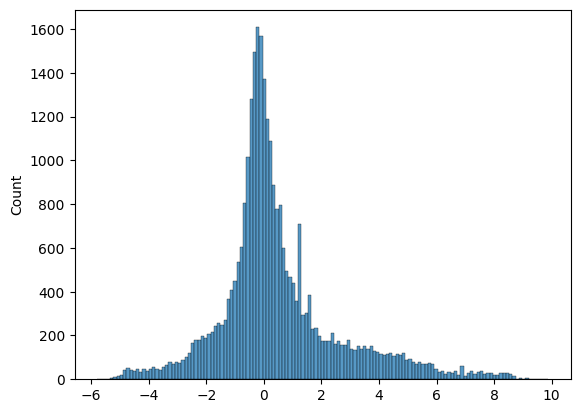

In [31]:
sns.histplot(test_prediction[0][:,0])

<Axes: ylabel='Count'>

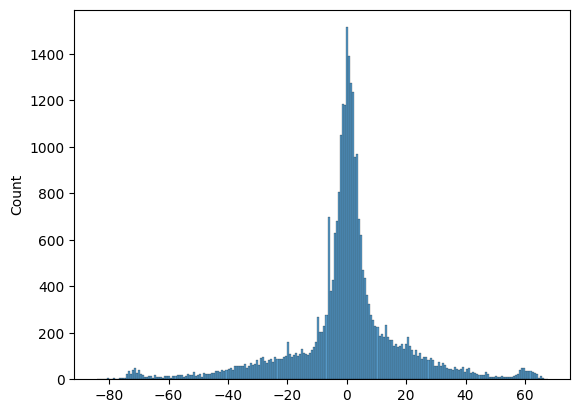

In [30]:
sns.histplot(test_prediction[1][:,0])

<Axes: ylabel='Count'>

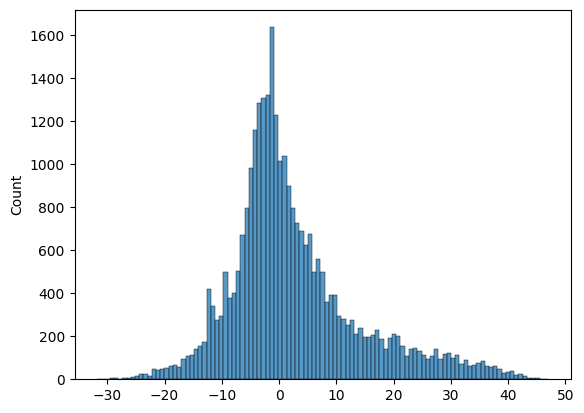

In [32]:
sns.histplot(test_prediction[2][:,0])

In [45]:
result_angles = tf.concat(angles_all_test_posenet, axis=0)

<Axes: ylabel='Count'>

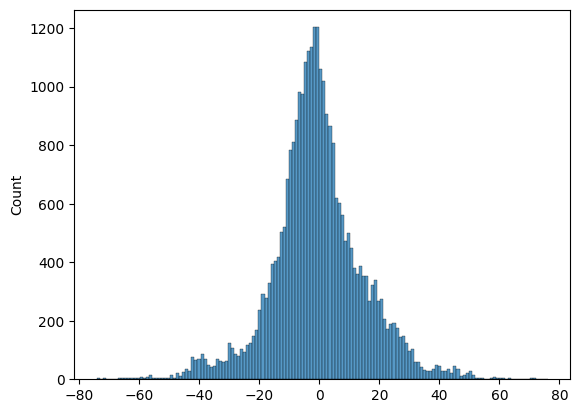

In [47]:
sns.histplot(result_angles [:,0])

<Axes: ylabel='Count'>

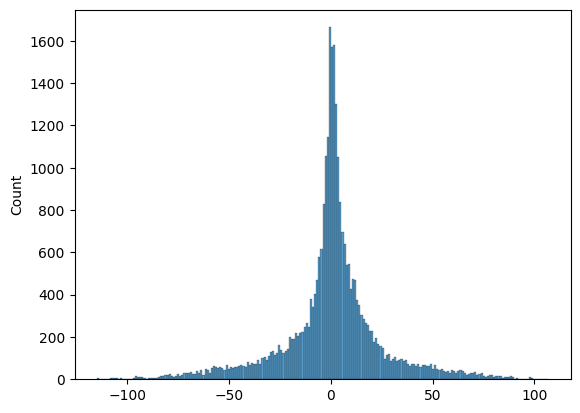

In [49]:
sns.histplot(result_angles [:,2])

<Axes: ylabel='Count'>

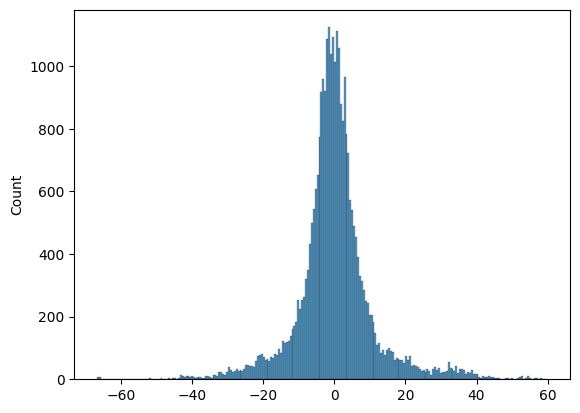

In [50]:
sns.histplot(result_angles [:,1])

In [54]:
unc_pr_yaw = test_prediction[0][:,1]
unc_pr_pitch = test_prediction[1][:,1]
unc_pr_roll = test_prediction[2][:,1]

In [55]:
print(tf.reduce_mean(tf.sqrt(tf.exp(unc_pr_yaw))))
print(tf.reduce_mean(tf.sqrt(tf.exp(unc_pr_pitch))))
print(tf.reduce_mean(tf.sqrt(tf.exp(unc_pr_roll))))

tf.Tensor(4.2617154, shape=(), dtype=float32)
tf.Tensor(5.223548, shape=(), dtype=float32)
tf.Tensor(5.0712605, shape=(), dtype=float32)


### Testing old loss

In [56]:
current_time = datetime.datetime.now()
today = datetime.date.today()
d1 = '' + today.strftime("%d-%m-%Y") + '_' + str(current_time.hour) + '_' + str(current_time.minute)
folder_results = r"results/posenet_trained"

mean_uncertainty_in_dataset, std_uncertainty_in_dataset = calculate_stats_in_dataset_from_kpts(kpts_all_train_posenet)

print(mean_uncertainty_in_dataset, std_uncertainty_in_dataset)

log_dir = "results/posenet_trained/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping_callback = keras.callbacks.EarlyStopping(
                # Stop training when `val_loss` is no longer improving
                monitor="val_loss",
                # "no longer improving" being defined as "no better than 1e-2 less"
                min_delta=0.0001, # almost everythinh is an improvemente
                # "no longer improving" being further defined as "for at least 5 epochs"
                patience=5,
                verbose=1,
                restore_best_weights = False, # take the weights 5 epochs after best
        )

my_results = {}
my_results['yaw_MAE_hpe'] = []
my_results['pitch_MAE_hpe'] = []
my_results['roll_MAE_hpe'] = []

0.8333215 0.37268856


In [57]:
# hhp_net(mean=mean_uncertainty_in_dataset, std=std_uncertainty_in_dataset,  alpha=1)
posenet_head_old = hhp_net_all_points(mean_uncertainty_in_dataset, std_uncertainty_in_dataset, a = 15, alpha=1)

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
     
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=1000, # new
        decay_rate=0.5,
        staircase=True)


posenet_head_old.compile(
                optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),  # Optimizer
                # Loss function to minimize
                loss=[Mse_loss_single_output_with_uncertainty(), Mse_loss_single_output_with_uncertainty(),
                      Mse_loss_single_output_with_uncertainty()],
                # List of metrics to monitor
                # metrics=[keras.metrics.MeanSquaredError()],
                metrics={'yaw'  : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                         'pitch': [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()],
                         'roll' : [Mean_Absolute_Error_HPE(), Save_Uncertainty_deg(), Angle_accuracy()]},
                # metrics = {'yaw': keras.metrics.MeanSquaredError(), 'pitch': keras.metrics.MeanSquaredError(), 'roll': keras.metrics.MeanSquaredError()},
        )

#posenet_head.summary()


In [59]:
for batch in train_dataset_posenet.take(1):
    inputs, targets = batch
    print("Inputs shape:", inputs['input'].shape)  # (batch_size, 15, 1)
    print("Yaw shape:", targets['yaw'].shape)     # (batch_size,)
    print("Pitch shape:", targets['pitch'].shape) # (batch_size,)
    print("Roll shape:", targets['roll'].shape)   # (batch_size,)
    print(inputs)
    print(targets)



train_dataset_posenet
for sample_batch in train_dataset_posenet.take(1):
    posenet_head_old(sample_batch[0])  # Pass input data only



Inputs shape: (128, 15, 1)
Yaw shape: (128, 1)
Pitch shape: (128, 1)
Roll shape: (128, 1)
{'input': <tf.Tensor: shape=(128, 15, 1), dtype=float32, numpy=
array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-1.        ],
        [ 1.        ],
        [ 1.        ]],

       [[-0.1       ],
        [ 0.78571427],
        [ 1.        ],
        ...,
        [-0.9       ],
        [ 0.42857143],
        [ 1.        ]],

       [[-0.03448276],
        [ 0.11111111],
        [ 1.        ],
        ...,
        [-0.8965517 ],
        [ 0.6666667 ],
        [ 1.        ]],

       ...,

       [[ 0.03773585],
        [ 1.        ],
        [ 1.        ],
        ...,
        [-1.        ],
        [ 1.        ],
        [ 1.        ]],

       [[ 0.22950819],
        [ 1.        ],
        [ 1.        ],
        ...,
        [-1.        ],
        [ 0.0625    ],
        [ 1.        ]],

       [[-0.02040816],
        [ 0.6666667 ],
        [ 1.        ],

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


In [61]:

EPOCHS = 300
history = posenet_head_old.fit(train_dataset_posenet, epochs=EPOCHS,
                               callbacks=[tensorboard_callback, early_stopping_callback], validation_data=val_dataset_posenet)


Epoch 1/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.3816 - pitch_MAE_hpe: 8.3349 - pitch_Save_UNC: 48.6158 - pitch_angle_accuracy: 0.8358 - pitch_loss: 0.8452 - roll_MAE_hpe: 15.9015 - roll_Save_UNC: 39.6237 - roll_angle_accuracy: 0.6637 - roll_loss: 0.8108 - yaw_MAE_hpe: 13.5701 - yaw_Save_UNC: 25.6476 - yaw_angle_accuracy: 0.6681 - yaw_loss: 0.7255 - val_loss: 2.3735 - val_pitch_MAE_hpe: 8.3505 - val_pitch_Save_UNC: 20.0000 - val_pitch_angle_accuracy: 0.8365 - val_pitch_loss: 0.8415 - val_roll_MAE_hpe: 15.9966 - val_roll_Save_UNC: 20.0000 - val_roll_angle_accuracy: 0.6622 - val_roll_loss: 0.8081 - val_yaw_MAE_hpe: 13.4329 - val_yaw_Save_UNC: 20.0000 - val_yaw_angle_accuracy: 0.6671 - val_yaw_loss: 0.7239
Epoch 2/300
669/669 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.3692 - pitch_MAE_hpe: 8.3231 - pitch_Save_UNC: 47.4368 - pitch_angle_accuracy: 0.8366 - pitch_loss: 0.8363 - roll_MAE_hpe: 15.8456 - roll_Save_UNC: 39.4726 - roll_angle_accuracy: 0.6644 - roll_loss: 0.8105 - ya

In [62]:
test_prediction_old = posenet_head_old.predict(test_dataset_posenet)

 53/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\Users\User\anaconda3\envs\Thesis\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: input. Received: the structure of inputs={'input': '*'}
  warnings.warn(


233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: ylabel='Count'>

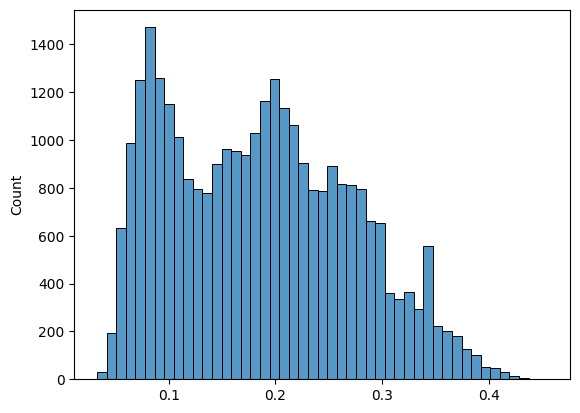

In [63]:
sns.histplot(test_prediction_old[0][:,0])

<Axes: ylabel='Count'>

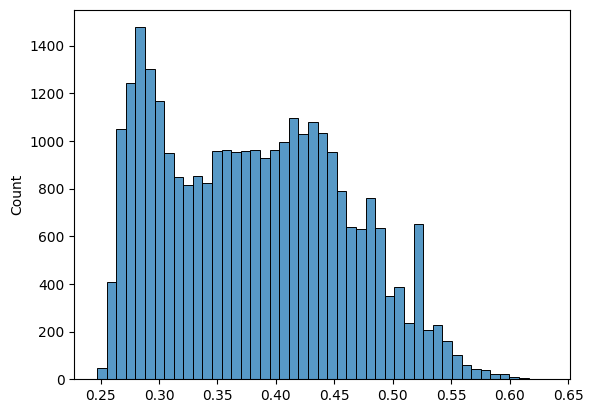

In [64]:


sns.histplot(test_prediction_old[1][:,0])

<Axes: ylabel='Count'>

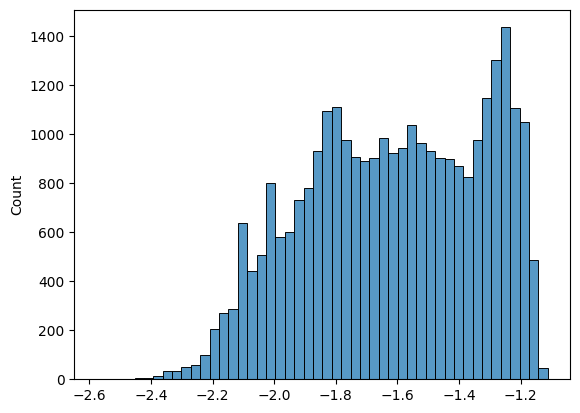

In [65]:

sns.histplot(test_prediction_old[2][:,0])